In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Fruit Classification/Train'
valid_path = '/content/gdrive/MyDrive/Fruit Classification/Test'

In [7]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/gdrive/MyDrive/Fruit Classification/Train/*')

In [10]:
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Fruit Classification/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 184 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Fruit Classification/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 216 images belonging to 4 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
6/6 [==============================] - 174s 31s/step - loss: 6.8171 - accuracy: 0.2663 - val_loss: 6.0810 - val_accuracy: 0.2315
Epoch 2/10
6/6 [==============================] - 62s 11s/step - loss: 5.2444 - accuracy: 0.2826 - val_loss: 3.4127 - val_accuracy: 0.3009
Epoch 3/10
6/6 [==============================] - 62s 11s/step - loss: 3.2638 - accuracy: 0.3043 - val_loss: 1.4755 - val_accuracy: 0.5370
Epoch 4/10
6/6 [==============================] - 62s 11s/step - loss: 1.7684 - accuracy: 0.3967 - val_loss: 1.3501 - val_accuracy: 0.3194
Epoch 5/10
6/6 [==============================] - 62s 11s/step - loss: 1.2409 - accuracy: 0.5326 - val_loss: 1.3233 - val_accuracy: 0.2593
Epoch 6/10
6/6 [==============================] - 61s 11s/step - loss: 1.0143 - accuracy: 0.6087 - val_loss: 0.5538 - val_accuracy: 0.7454
Epoch 7/10
6/6 [==============================] - 62s 11s/step - loss: 0.7886 - accuracy: 0.6685 - val_loss: 0.7245 - val_accuracy: 0.6667
Epoch 8/10
6/6 [==========

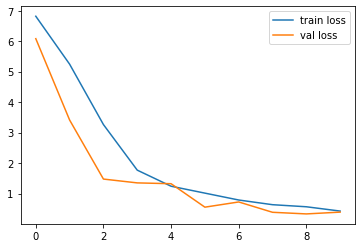

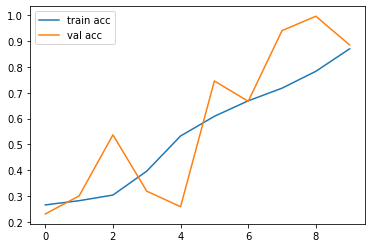

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')